# Project in APML

Contributors:

- Bjørn Christian Weinbach
- Emil
- Markus

## Question 5 A first Gibbs sampler

Want to estimate posterior

$$
p(s_1, s_2|y=1)
$$

And we know that $p(y=1)$ = $p(t>0)$.

so

$$
p(s_1, s_2|t>0)
$$

In [472]:
import numpy as np
import scipy.stats
import matplotlib.pyplot
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def gibbsSampler(L, burn=0):
    L = L

    # Initial Chain of values
    s1 = np.zeros(L)
    s2 = np.zeros(L)
    t = np.zeros(L)
    y = 1
    s1[0] = 10
    s2[0] = 10
    t[0] = 1

    # Hyperparameters
    sigma_s = np.array([[1, 0], [0, 1]])
    mu_s = np.array([1, 1])
    sigma_ts = 1

    def corr1(sigmaa, A, sigmaba, mua, xb): 
        sigmaab = np.linalg.pinv(np.linalg.pinv(sigmaa) + np.outer(A.T, A)*sigmaba**-1)
        muab = sigmaab@(np.linalg.pinv(sigmaa)@mua + A.T*sigmaba**-1*xb)
        return sigmaab, muab

    for l in range(L-1):
        # Sample S
        A = np.array([s1[l], -s2[l]])
        sigma_st, mu_st = corr1(sigma_s, A, sigma_ts, mu_s, t[l])
        s1[l+1], s2[l+1] = scipy.stats.multivariate_normal.rvs(mean=mu_st, cov=sigma_st)

        # Sample T
        smean = s1[l] - s2[l]
        # mismatch
        a_scaled, b_scaled = (0 - (smean)) / sigma_ts, (np.inf - (smean)) / sigma_ts
        # mismatch
        t[l+1] = scipy.stats.truncnorm.rvs(a_scaled, b_scaled, loc=smean, scale=np.sqrt(sigma_ts))
    return s1[burn:], s2[burn:], t[burn:]

In [473]:
s1, s2, t = gibbsSampler(10**4)

In [451]:
experiment = pd.DataFrame(
    {
        "s1": s1[50:],
        "s2": s2[50:],
        "t": t[50:]
    }
)

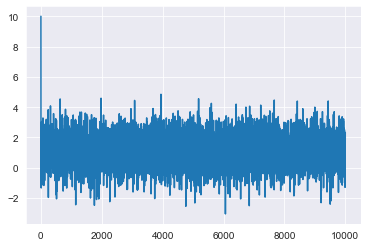

In [414]:
plt.plot(s1)

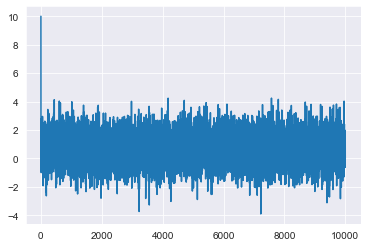

In [415]:
plt.plot(s2)

<Figure size 1080x1080 with 0 Axes>

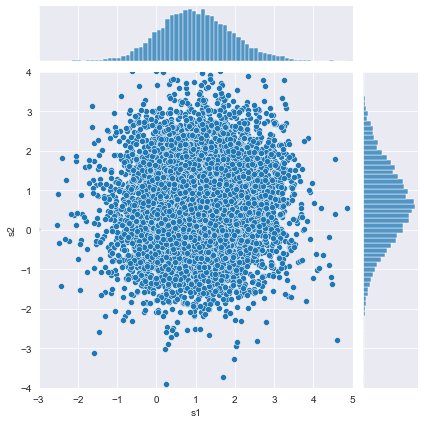

In [416]:
plt.figure(figsize=(15, 15))
sns.set_style("darkgrid")
sns.jointplot(data=experiment, x="s1", y="s2",
              xlim=(-3, 5), ylim=(-4, 4))
plt.savefig("gibbs.png")

<AxesSubplot:xlabel='t', ylabel='Probability'>

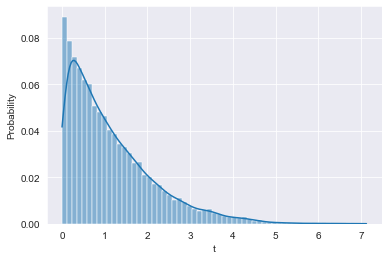

In [417]:
sns.histplot(experiment, x="t", kde=True, fill=True, stat='probability')

### Trueskill representation of the skills

We will transform the samples into a gaussian. We will do this by approximating it as a gaussian.

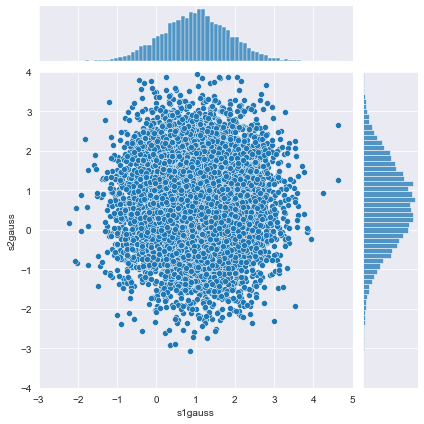

In [428]:
def gaussianApprox(samples):
    return scipy.stats.norm(loc=np.mean(samples), scale=np.var(samples))

s1gauss = gaussianApprox(experiment.s1)
s2gauss = gaussianApprox(experiment.s2)

approximation = pd.DataFrame(
    {
        "s1gauss" : s1gauss.rvs(L),
        "s2gauss" : s2gauss.rvs(L),
    }
)

sns.jointplot(data=approximation, x="s1gauss", y="s2gauss",
              xlim=(-3, 5), ylim=(-4, 4))

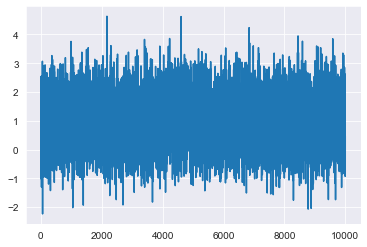

In [429]:
plt.plot(approximation.s1gauss)

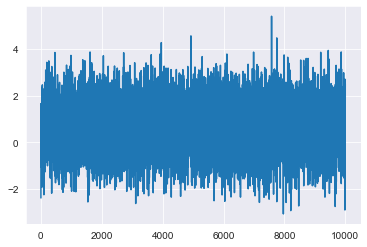

In [430]:
plt.plot(approximation.s2gauss)

### Plot histogram of samples with fitted gaussians $L=10^4$

In [482]:
s1, s2, t = gibbsSampler(10**4+50, burn=50)

Text(0.5, 1.0, '$S_1$ samples vs approximation for $L =10^4$ samples')

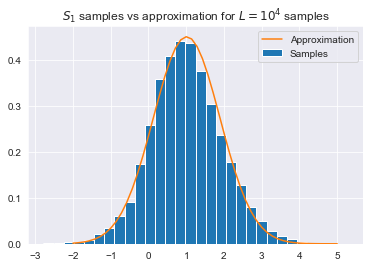

In [483]:
s1gauss = gaussianApprox(s1)
x = np.linspace(-2, 5)
plt.hist(s1, bins=30, density=True, label='Samples')
plt.plot(x, s1gauss.pdf(x), label='Approximation')
plt.legend()
plt.title("$S_1$ samples vs approximation for $L =10^4$ samples")

Text(0.5, 1.0, '$S_2$ samples vs approximation for $L =10^4$ samples')

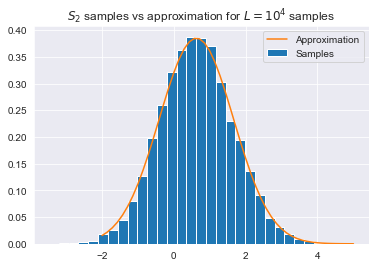

In [484]:
s2gauss = gaussianApprox(s2)
x = np.linspace(-2, 5)
plt.hist(s2, bins=30, density=True, label='Samples')
plt.plot(x, s2gauss.pdf(x), label='Approximation')
plt.legend()
plt.title("$S_2$ samples vs approximation for $L =10^4$ samples")

### Plot histogram of samples with fitted gaussians $L=10^3$

In [485]:
s1, s2, t = gibbsSampler(10**3+50, 50)

Text(0.5, 1.0, '$S_1$ samples vs approximation for $L =10^3$ samples')

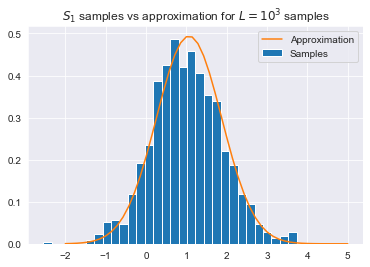

In [486]:
s1gauss = gaussianApprox(s1)
x = np.linspace(-2, 5)
plt.hist(s1, bins=30, density=True, label='Samples')
plt.plot(x, s1gauss.pdf(x), label='Approximation')
plt.legend()
plt.title("$S_1$ samples vs approximation for $L =10^3$ samples")

Text(0.5, 1.0, '$S_2$ samples vs approximation for $L =10^3$ samples')

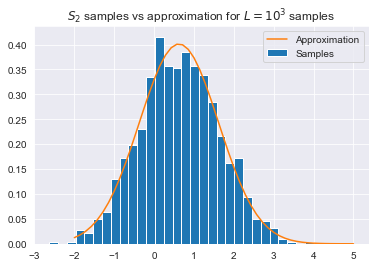

In [487]:
s2gauss = gaussianApprox(s2)
x = np.linspace(-2, 5)
plt.hist(s2, bins=30, density=True, label='Samples')
plt.plot(x, s2gauss.pdf(x), label='Approximation')
plt.legend()
plt.title("$S_2$ samples vs approximation for $L =10^3$ samples")

### Plot histogram of samples with fitted gaussians $L=100$

In [497]:
s1, s2, t = gibbsSampler(100+50, 50)

Text(0.5, 1.0, '$S_1$ samples vs approximation for $L =10^3$ samples')

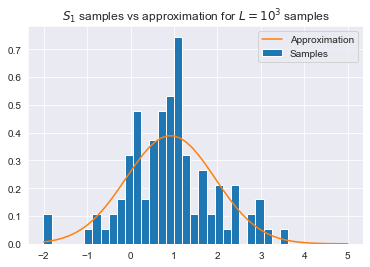

In [493]:
s1gauss = gaussianApprox(s1)
x = np.linspace(-2, 5)
plt.hist(s1, bins=30, density=True, label='Samples')
plt.plot(x, s1gauss.pdf(x), label='Approximation')
plt.legend()
plt.title("$S_1$ samples vs approximation for $L =100$ samples")

Text(0.5, 1.0, '$S_1$ samples vs approximation for $L =10^3$ samples')

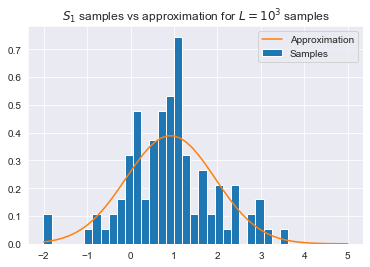

In [495]:
s2gauss = gaussianApprox(s2)
x = np.linspace(-2, 5)
plt.hist(s1, bins=30, density=True, label='Samples')
plt.plot(x, s1gauss.pdf(x), label='Approximation')
plt.legend()
plt.title("$S_1$ samples vs approximation for $L =100$ samples")

### Plot histogram of samples with fitted gaussians $L=30$

In [498]:
s1, s2, t = gibbsSampler(30+50, 50)

Text(0.5, 1.0, '$S_1$ samples vs approximation for $L =30$ samples')

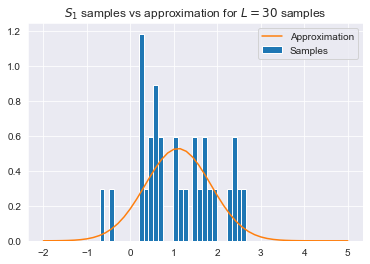

In [500]:
s1gauss = gaussianApprox(s1)
x = np.linspace(-2, 5)
plt.hist(s1, bins=30, density=True, label='Samples')
plt.plot(x, s1gauss.pdf(x), label='Approximation')
plt.legend()
plt.title("$S_1$ samples vs approximation for $L =30$ samples")

Text(0.5, 1.0, '$S_1$ samples vs approximation for $L =30$ samples')

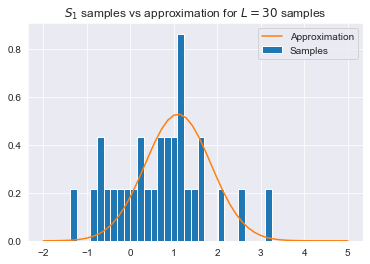

In [501]:
s2gauss = gaussianApprox(s2)
x = np.linspace(-2, 5)
plt.hist(s2, bins=30, density=True, label='Samples')
plt.plot(x, s1gauss.pdf(x), label='Approximation')
plt.legend()
plt.title("$S_1$ samples vs approximation for $L =30$ samples")

### Compare priors with posteriors given thet $p(s|y=1)$

Our prior stated:

$$
p(s_1) = \sim N(s_1; 1, 1)
$$

$$
p(s_2) = \sim N(s_2; 1, 1)
$$

Empirically we have:

In [514]:
np.mean(s1)

1.0969392631533235

In [515]:
np.var(s1)

0.7553980213214793

In [516]:
np.mean(s2)

0.6631028289549836

In [517]:
np.var(s2)

1.0552204264903924